# Video Game Success Ranking

We work for the online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. We need to identify patterns that determine whether a game succeeds or not. This will allow us to spot potential big winners and plan advertising campaigns. We will be using 2016 data and forecaasting for 2017.

The dataset contains the abbreviation ESRB. The Entertainment Software Rating Board evaluates a game's content and assigns an age rating such as Teen or Mature.

## Table of Contents

- [Dataset Description](#description)
- [Fixing Column Names](#name)
- [Missing Values](#values)
    - [Missing Name Data](#missingname)
    - [Missing year_of_release values](#missingyear)
    - [Missing Genre Data](#missinggenre)
    - [Missing user_score TBD Values](#missinguserscore)
    - [Missing Crtitic Score Values](#missingcriticscore)
    - [Missing Rating Values](#missingrating)
    - [Calculating The Total Sales](#totalsales)
- [Data Analysis](#dataanalysis)
- [User Profile For Each Region](#userregion)
    - [Creating a Profile For NA Region](#nareg)
    - [Creating a Profile For EU Region](#eureg)
    - [Creating a Profile For JP Region](#jpreg)
- [Hypothesis Test](#hypotest)
    - [Hypothesis Test: Average user ratings of the Xbox One and PC platform are the same](#hp1)
    - [Hypothesis Test: Average user ratings for the Action and Sports genre are the different](#hp2)
- [General Conclusion](#gencon)

In [1]:
#importing used libraties
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset Description<br>
<div id='description' ></div>
—Name: The name of game <br>
—Platform: The name of platform e.g.(xbox, playstation)<br>
—Year_of_Release: The year game is released<br>
—Genre: The genre of the game<br>
—NA_sales: North American sales in USD million<br>
—EU_sales: sales in Europe in USD million<br>
—JP_sales: sales in Japan in USD million<br>
—Other_sales: sales in other countries in USD million<br>
—Critic_Score: maximum of 100<br>
—User_Score: maximum of 10<br>
—Rating: ESRB, Entertainment Software Rating Board evaluates a game's content and assigns an age rating such as Teen or Mature

In [2]:
#importing data
try:
    df = pd.read_csv('C:/Users/Wandile/Documents/PracticumProjects/IntergratedProject1/games.csv')
except:
    df = pd.read_csv('/datasets/games.csv')


In [3]:
#checking missing values
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Comment: The missing values in the name, year_of_release, genre, critic_score, user_score and rating columns have to be investigated.

In [4]:
#checking duplicated data
df.duplicated().sum()

0

In [5]:
#checking the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Comment: The most of the data types are fine but a few columns need to be changed such as:
- Year_of_Release must be changed to a datetime type or an integer
- User_Score must be changed to a float

Investigating the User_Score column further to determine why it's data type is an object type.

In [6]:
df['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [7]:
(df['User_Score']=='tbd').sum()

2424

Comment: Looking at the score catagory there is 'tbd' which means 'to be determined' this is another for of missing values and there are 2424 rows of such entries.

In [8]:
display(df)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [9]:
#checking the shape of the data
df.shape

(16715, 11)

In [10]:
#checking if columns are named correctly
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Comment: the columns names has to be changed to snake_case from camel and snake_case

In [11]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [12]:
#checking for irregular columns 
col = ['Platform','Genre','Rating']
for c in col:
    print(f'Column Name: {c}')
    print(f'Unique Values: {df[c].unique()}',end='\n\n')

Column Name: Platform
Unique Values: ['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']

Column Name: Genre
Unique Values: ['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]

Column Name: Rating
Unique Values: ['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']



Comment: There seems to be no irregular category in any any of the columns. Each value referes to a uniue catagory.

Summary: 
- The column names have to be changed to snake case
- The User_Score data type has to be changed to a float and the 'tbd' values have to be dealt with as missing values
- The Year_release column must be changed to a integer or datetime
- The missing values have to be investigated for each column then determine whether they're missing randomly then replace them if necessary.
- There is no duplicated data in the dataset.



## Fixing Column Names <br>
<div id='name'></div>
Below we're changing the column names to snake case

In [13]:
#creating new lower case column names
new_col = []
for col in df.columns:
    new_col.append(col.lower())
    
df.columns = new_col

In [14]:
#checking new column names
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


## Missing Values<br>
<div id='values'></div>

Below we deal with missing values in the dataset.

In [15]:
#columns with missing values
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

### Missing Name Data<br>
<div id='missingname'></div>

Dealing with missing values in the genre column

In [16]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [17]:
df = df.drop(df.index[[659,14244]])

In [18]:
df['name'].isna().sum()

0

Comment: The records with no names are records that also do not have a genre, critic score, user score and rating. This data has too many missing values and because it is just two records removing these won't have an impact on the dataset when removed but will cause problems to replace the missing values. For these reasons I decided to remove these two records from the data set.

### Missing year_of_release values<br>
<div id='missingyear'></div>

Here we look at and fixing the year of release column and investgate it's missing values.

In [19]:
#Fixing TBD Values
missing_percentage = round(df['year_of_release'].isna().sum()/df.shape[0],2)
print(f'Percentage of missing year of release games: {100*missing_percentage}%')

Percentage of missing year of release games: 2.0%


In [20]:
missing_years = df[df['year_of_release'].isna()].index

In [21]:
df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Comment: Some of the games have the year of release in their names so we will replace the empty year of release with the one in the name.

In [22]:
def extract_year_rec(row):
    name = row['name']
    genre = row['genre']
    name_date = None
    try:
        name_date = int(name[-4:])
        return name_date
    except:
        return None
    return name_date

In [23]:
df_copy = df.copy()
df_copy['name_date'] =df_copy.apply(extract_year_rec,axis = 1)
df_copy

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,name_date
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,NaN
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,NaN
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,2007.0
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,NaN


In [24]:
has_name_date = df_copy[~df_copy['name_date'].isna()]
has_name_date.head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,name_date
82,GoldenEye 007,N64,1997.0,Shooter,5.80,2.01,0.13,0.15,NaN,NaN,NaN,7.0
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E,2004.0
206,Warzone 2100,PS,1999.0,Strategy,2.79,1.89,0.00,0.33,NaN,NaN,NaN,2100.0
238,Madden NFL 2005,PS2,2004.0,Sports,4.18,0.26,0.01,0.08,91.0,7.9,E,2005.0
250,Winning Eleven: Pro Evolution Soccer 2007,PS2,2006.0,Sports,0.10,2.39,1.05,0.86,86.0,8.9,E,2007.0
283,Madden NFL 2003,PS2,2002.0,Sports,3.36,0.21,0.01,0.56,95.0,7.7,E,2003.0
338,FIFA Soccer 2005,PS2,2004.0,Sports,0.58,2.48,0.04,0.59,81.0,7.6,E,2005.0
349,Pro Evolution Soccer 2008,PS2,2007.0,Sports,0.05,0.00,0.64,2.93,82.0,7.9,E,2008.0
359,Just Dance 2014,Wii,2013.0,Misc,1.88,1.39,0.00,0.31,NaN,6.2,E10+,2014.0
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E,2004.0


In [25]:
has_name_date = df_copy[~df_copy['name_date'].isna()]
same_years = (has_name_date['name_date']==has_name_date['year_of_release']).sum()
diff_years = (has_name_date['name_date']-1==has_name_date['year_of_release']).sum()
percentage_case = round(same_years/(same_years+diff_years),2)
print(f'In {100*percentage_case}% there are cases with same years and {100*(1-percentage_case)}% there are different cases')

In 41.0% there are cases with same years and 59.00000000000001% there are different cases


In [26]:
df_copy[(df_copy['year_of_release'].isna())&(~df_copy['name_date'].isna())].shape

(16, 12)

In [27]:
df_copy[(df_copy['year_of_release'].isna())&(df_copy['name_date'].isna())].shape

(253, 12)

Comment: When looking at year information, we can leave the records with no year as NULL and drop them during analysis but we won't do this we will replace the remaining records with the median release year.

In [28]:
def replace_missing_years(row):
    if pd.isnull(row['year_of_release']):
        year = extract_year_rec(row)
        if year and year > 500:
            return year
        else:
            return None
    else:
        return row['year_of_release']

In [29]:
df['year_of_release'] = df.apply(replace_missing_years, axis=1)

Comment: Above we replace the missing year values by the years in the name of the game.

In [30]:
#replace with remaining values with zero
df.loc[df['year_of_release'].isna(),'year_of_release'] 

456     NaN
609     NaN
627     NaN
657     NaN
678     NaN
         ..
16348   NaN
16405   NaN
16448   NaN
16458   NaN
16522   NaN
Name: year_of_release, Length: 254, dtype: float64

In [31]:
df['year_of_release'].isna().sum()

254

Comment: All the year of release records have been replaced by either the year in the name of the game or left as NA as adding the median will distort the data.

### Missing user_score TBD Values<br>
<div id='missinguserscore'></div>

Here we transform the user_score data to floats and replacing the missing values

In [32]:
#Fixing TBD Values
missing_percentage = round((df['user_score']=='tbd').sum()/df.shape[0],2)
print(f'Percentage of missing TBD user scores make up: {100*missing_percentage}% of the scores')

Percentage of missing TBD user scores make up: 15.0% of the scores


Comment: Because the users are yet to score these games, there basically are no scores. We can either do the following to replace these values:
- Replace the values with median user score
- Replace the values with the mean user score
- Discard the records completely

In [33]:
#Fixing TBD values 
df[df['user_score']=='tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [34]:
df.loc[df['user_score']=='tbd','user_score']=np.nan
df['user_score'] = df['user_score'].astype(float)

In [35]:
df['user_score'] = df['user_score'].fillna(0)

In [36]:
df['user_score'].isna().sum()

0

Comment: Above the missing values are replaced by the value zero as we do not want to distort the data as this will lead to incorrect analysis.

In [37]:
df['critic_score'] = df['critic_score'].fillna(0)

In [38]:
df['critic_score'].isna().sum()

0

Comment: Above the missing values are replaced by the value zero as we do not want to distort the data as this will lead to incorrect analysis.

In [39]:
df['rating'] = df['rating'].fillna(0)

In [40]:
df['rating'].isna().sum()

0

Comment: Above the missing values are replaced by the value zero as we do not want to distort the data as this will lead to incorrect analysis.

### Caluating The Total Sales<br>
<div id='totalsales'></div>
Below we will calculate the total sales of each game.

In [41]:
df['total_sales']=df[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)
df['total_sales']

0        82.54
1        40.24
2        35.52
3        32.77
4        31.38
         ...  
16710     0.01
16711     0.01
16712     0.01
16713     0.01
16714     0.01
Name: total_sales, Length: 16713, dtype: float64

Comment: Above we add the total sales from all regions of all the games in a new column.

## Data Analysis<br>
<div id='dataanalysis'></div>

- Look at how many games were released in different years. Is the data for every period significant?

In [42]:
#make a copy of the data for preservation
df_copy = df.copy()

In [43]:
#counting the number of games released per year
years_df = df[~df.index.isin(missing_years)]
game_count_by_years = years_df.pivot_table(index='year_of_release', values='name',aggfunc='count').reset_index()
game_count_by_years.rename(columns={'name':'count'},inplace=True)
game_count_by_years.sort_values(by='count',inplace=True)
game_count_by_years

,year_of_release,count
0,1980.0,9
4,1984.0,14
5,1985.0,14
8,1988.0,15
10,1990.0,16
7,1987.0,16
9,1989.0,17
3,1983.0,17
6,1986.0,21
2,1982.0,36


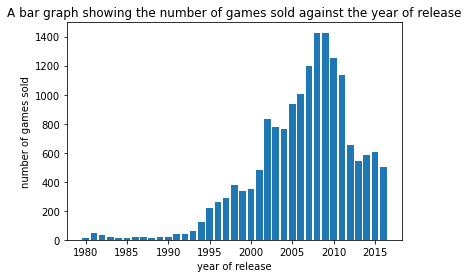

In [44]:
plt.bar(x='year_of_release',height='count',data=game_count_by_years)
plt.xlabel('year of release')
plt.ylabel('number of games sold')
plt.title('A bar graph showing the number of games sold against the year of release')
plt.show()

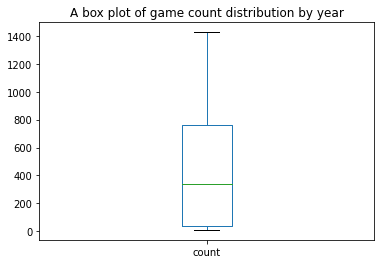

In [45]:
game_count_by_years['count'].plot(kind='box')
plt.title('A box plot of game count distribution by year')
plt.show()

Comment: From the above graphs it is seen that most games were sold in the years 2007 and 2008. The median number of games sold is just below 400 and the distribution is right skewed.

- Look at how sales varied from platform to platform.   

In [46]:
#Adding the total sales of each platform
sales_by_platform = years_df.pivot_table(index='platform', values='total_sales',aggfunc='sum').reset_index()
sales_by_platform.rename(columns={'total_sales':'sum'},inplace=True)
sales_by_platform.sort_values(by='sum',ascending=False,inplace=True)
sales_by_platform

,platform,sum
16,PS2,1233.56
28,X360,961.24
17,PS3,931.34
26,Wii,891.18
4,DS,802.78
15,PS,727.58
18,PS4,314.14
6,GBA,312.88
19,PSP,289.53
2,3DS,257.81


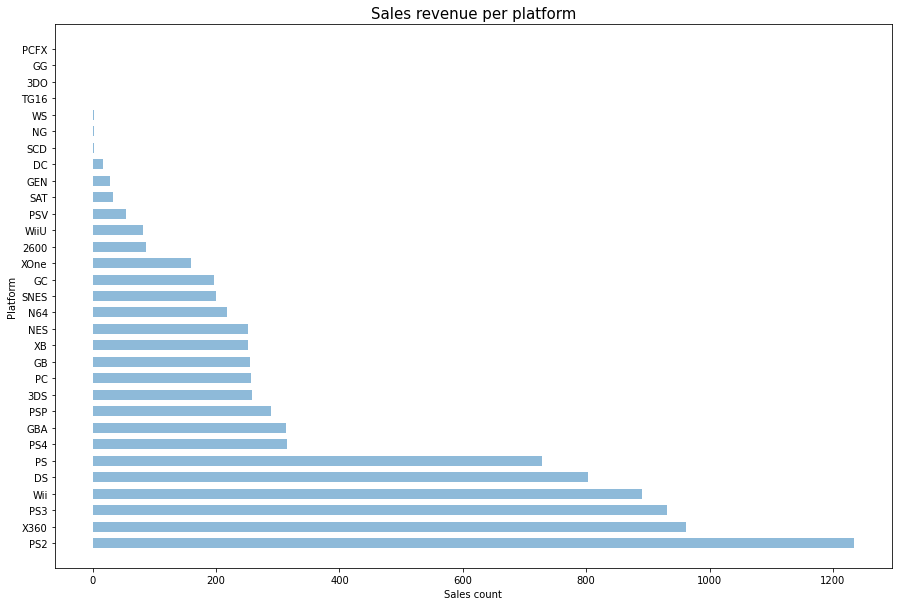

In [47]:
    plt.figure(figsize=(15,10)) #increase the plot with
    plt.hlines(
        y=sales_by_platform.platform, xmax=sales_by_platform['sum'], xmin=0, linewidth=10, alpha=0.5
    )

    plt.ylabel('Platform')
    plt.xlabel('Sales count')
    plt.title('Sales revenue per platform', size=15);

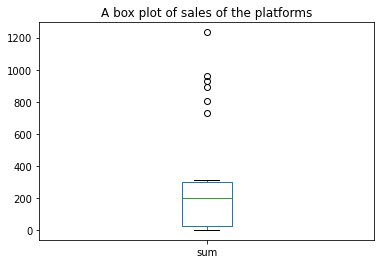

In [48]:
sales_by_platform['sum'].plot(kind='box')
plt.title('A box plot of sales of the platforms')
plt.show()

Comment: The above graphs shows that the PS2, X360, and PS3 are the top 3 platforms in sales. The sales decrease per platform. The boxplot shows that the median sales of a platform is about 200 and the distribution is left skewed.

- Choose the platforms with the greatest total sales and build a distribution based on data for each year.

In [49]:
#picking the top 5 platforms
top_platforms_list = list(sales_by_platform['platform'][:5])
top_platforms_list

['PS2', 'X360', 'PS3', 'Wii', 'DS']

In [50]:
#Adding the total sales of each top five platform per year
top_platforms = years_df[years_df['platform'].isin(top_platforms_list)]
top_platform_by_year = top_platforms.pivot_table(index=['platform','year_of_release'],values='total_sales',aggfunc='sum').reset_index()
top_platform_by_year.rename(columns={'total_sales':'sum'},inplace=True)
top_platform_by_year.sort_values(by=['platform','year_of_release'],ascending=False,inplace=True)
top_platform_by_year

,platform,year_of_release,sum
56,X360,2016.0,1.52
55,X360,2015.0,11.96
54,X360,2014.0,34.74
53,X360,2013.0,88.58
52,X360,2012.0,99.74
51,X360,2011.0,143.84
50,X360,2010.0,170.03
49,X360,2009.0,120.29
48,X360,2008.0,135.26
47,X360,2007.0,95.41


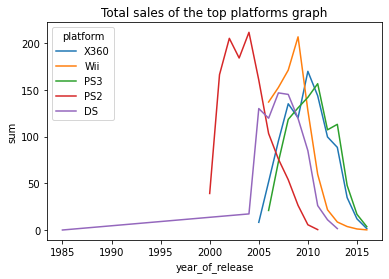

In [51]:
sns.lineplot(x='year_of_release',y='sum',data=top_platform_by_year,hue='platform')
plt.title('Total sales of the top platforms graph')
plt.show()

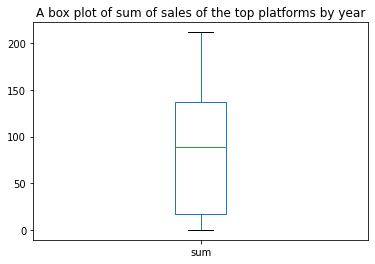

In [52]:
top_platform_by_year['sum'].plot(kind='box')
plt.title('A box plot of sum of sales of the top platforms by year')
plt.show()

Comment: The above graphs show that the top five platforms sales by year. The median sales of the top five platform per year is roughly below 100 and the distrubition is slightly left skewed.

- Find platforms that used to be popular but now have zero sales.

Below we firstly find platforms with no sales.

In [53]:
no_sales = (years_df['total_sales']==0).sum()
print(f'The number of games with no sales is {no_sales}')

The number of games with no sales is 2


In [54]:
platform_sales_by_year = years_df.pivot_table(index=['platform','year_of_release'],values='total_sales',aggfunc='sum').reset_index()
platforms_without_sales = platform_sales_by_year[platform_sales_by_year['total_sales']==0].shape[0]
print(f'The number of platforms with no sales by year {platforms_without_sales}')

The number of platforms with no sales by year 0


In [55]:
#Adding the columns last year of release and first year of release of a game.
platform_sales_by_year['last_game_release_year']=platform_sales_by_year.groupby('platform')['year_of_release'].transform('max')
platform_sales_by_year['first_game_release_year']=platform_sales_by_year.groupby('platform')['year_of_release'].transform('min')
platform_sales_by_year

,platform,year_of_release,total_sales,last_game_release_year,first_game_release_year
0,2600,1980.0,11.38,1989.0,1980.0
1,2600,1981.0,35.68,1989.0,1980.0
2,2600,1982.0,28.88,1989.0,1980.0
3,2600,1983.0,5.84,1989.0,1980.0
4,2600,1984.0,0.27,1989.0,1980.0
...,...,...,...,...,...
233,XB,2008.0,0.18,2008.0,2000.0
234,XOne,2013.0,18.96,2016.0,2013.0
235,XOne,2014.0,54.07,2016.0,2013.0
236,XOne,2015.0,60.14,2016.0,2013.0


In [56]:
#Summing all the sales of each platform and placing them in descending order
all_retired_platforms = platform_sales_by_year[platform_sales_by_year['last_game_release_year']<2016]
retired_platforms = all_retired_platforms.pivot_table(index='platform',values='total_sales',aggfunc='sum').reset_index()
retired_platforms.sort_values('total_sales', ascending=False,inplace=True)
retired_platforms

,platform,total_sales
14,PS2,1233.56
3,DS,802.78
13,PS,727.58
5,GBA,312.88
15,PSP,289.53
4,GB,254.43
21,XB,251.57
10,NES,251.05
9,N64,218.01
18,SNES,200.04


In [57]:
print('Top 10 platforms that are no longer released: ',retired_platforms['platform'][:10].values)

Top 10 platforms that are no longer released:  ['PS2' 'DS' 'PS' 'GBA' 'PSP' 'GB' 'XB' 'NES' 'N64' 'SNES']


Comment: From the above analysis it is seen that the top best selling platforms are the 'PS2' 'DS' 'PS' 'GBA' 'PSP' 'GB' 'XB' 'NES' 'N64' and the 'SNES'.

- How long does it generally take for new platforms to appear and old ones to fade?

In [58]:
#Calculating the lifespan of each platform
unique_platform = all_retired_platforms.pivot_table(index=['platform','last_game_release_year','first_game_release_year'],values='total_sales',aggfunc='count').reset_index()
unique_platform['lifespan'] = unique_platform['last_game_release_year']-unique_platform['first_game_release_year']
unique_platform

,platform,last_game_release_year,first_game_release_year,total_sales,lifespan
0,2600,1989.0,1980.0,10,9.0
1,3DO,1995.0,1994.0,2,1.0
2,DC,2008.0,1998.0,7,10.0
3,DS,2013.0,1985.0,11,28.0
4,GB,2001.0,1988.0,13,13.0
5,GBA,2007.0,2000.0,8,7.0
6,GC,2007.0,2001.0,7,6.0
7,GEN,1994.0,1990.0,5,4.0
8,GG,1992.0,1992.0,1,0.0
9,N64,2002.0,1996.0,7,6.0


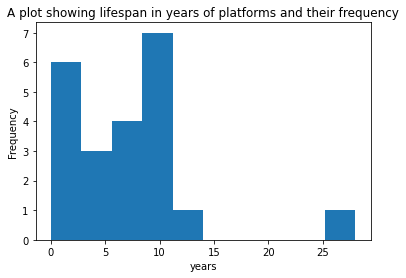

In [59]:
#Distribution of platform release years
unique_platform['lifespan'].plot(kind='hist',bins=10)
plt.title('A plot showing lifespan in years of platforms and their frequency')
plt.xlabel('years')
plt.show()

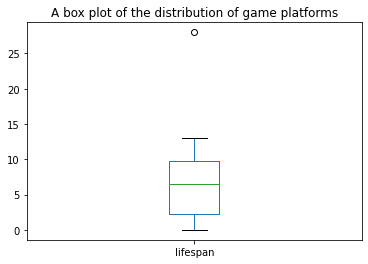

In [60]:
unique_platform['lifespan'].plot(kind='box')
plt.title('A box plot of the distribution of game platforms')
plt.show()

Comment: The above graph shows that the median lifespan of a platform is roughly 6 years and the distribution is slighlty left skewed.

- Determine what period you should take data for. To do so, look at your answers to the previous questions. The data should allow you to build a model for 2017.

In [61]:
#Counting number of platforms released in each year
df.pivot_table(index='year_of_release',values='platform',aggfunc='count').reset_index().sort_values('platform',ascending=False)[5:]

,year_of_release,platform
26,2006.0,1008
25,2005.0,941
22,2002.0,830
23,2003.0,779
24,2004.0,764
32,2012.0,653
35,2015.0,606
34,2014.0,581
33,2013.0,544
36,2016.0,502


We select the year 2015 because of a few unique reasons:
- It is not too far away from the requested year forecast.
- It has the highest recent platforms.

This implies this year has enough data to model with.

In [62]:
#Picking the year with the most data to work with
selected_yr_df = df[df['year_of_release']==2015].copy()
selected_yr_df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,0.0,0.0,0,14.63
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,0.0,0.0,0,7.98
99,Call of Duty: Black Ops 3,XOne,2015.0,Shooter,4.59,2.11,0.01,0.68,0.0,0.0,0,7.39
105,Fallout 4,PS4,2015.0,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17
...,...,...,...,...,...,...,...,...,...,...,...,...
16597,Saints Row: Gat out of Hell,XOne,2015.0,Action,0.00,0.01,0.00,0.00,65.0,6.0,M,0.01
16608,Mario & Luigi: Paper Jam & Mario Kart 7 Double...,3DS,2015.0,Misc,0.00,0.00,0.01,0.00,0.0,0.0,0,0.01
16610,Kiniro no Corda 3,3DS,2015.0,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,0,0.01
16618,Xblaze: Lost Memories,PSV,2015.0,Adventure,0.01,0.00,0.00,0.00,0.0,7.0,M,0.01


Which platforms are leading in sales?

In [63]:
selected_yr_df.pivot_table(index='platform',values='total_sales',aggfunc='sum').reset_index().sort_values('total_sales',ascending=False)

,platform,total_sales
3,PS4,118.90
9,XOne,60.14
0,3DS,27.78
2,PS3,16.82
7,WiiU,16.35
8,X360,11.96
1,PC,8.52
5,PSV,6.25
6,Wii,1.14
4,PSP,0.12


Which ones are growing or shrinking?

In [104]:
#df_copy2 = df.copy()
top_sales_platforms = ['PS4','XOne','3DS','PS3','WiiU','X360','PC','PSV','Wii']
top_platforms = df_copy2[df_copy2['platform'].isin(top_sales_platforms)]
top_platforms = top_platforms.pivot_table(index=['platform','year_of_release'],values='total_sales',aggfunc='sum').reset_index()
top_platforms.rename(columns={'total_sales':'sum'},inplace=True)
top_platforms.sort_values(by=['platform','year_of_release'],ascending=False,inplace=True)
top_platforms = top_platforms[top_platforms['year_of_release']>=2015]
top_platforms

,platform,year_of_release,sum
84,XOne,2016.0,26.15
83,XOne,2015.0,60.14
80,X360,2016.0,1.52
79,X360,2015.0,11.96
68,WiiU,2016.0,4.60
67,WiiU,2015.0,16.35
63,Wii,2016.0,0.18
62,Wii,2015.0,1.14
52,PSV,2016.0,4.25
51,PSV,2015.0,6.25


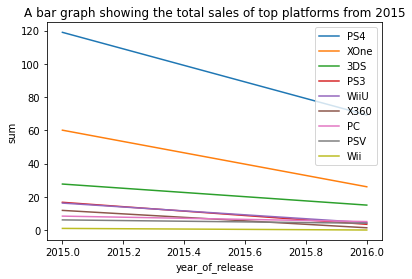

In [105]:
for x in top_sales_platforms:
    sns.lineplot(x='year_of_release',y='sum',data=top_platforms[top_platforms['platform']==x])
plt.legend(top_sales_platforms)
plt.title('A bar graph showing the total sales of top platforms from 2015')
plt.show()

Comment: The above graph shows that from 2015, the year we selected, all the platforms are declining. It is seen that the PS4, XBox One and 3DS sales are the highest meaning they are likely to continue to sell in 2017. The PS3, WiiU and X360 are shrinking markets. The PC, PSV and Wii and consistent small markets. They are likely to also be selling in 2017 in small numbers.

Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.

Below we select the PS4 platform to analyse the user score and critic score against total sales. We pick the PS4 as it is the most popular platform. We will use scatter plots to formulate our conclusion.

In [106]:
ps2_df = df[df['platform']=='PS4']
ps2_df.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,0.0,0.0,0,14.63
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58


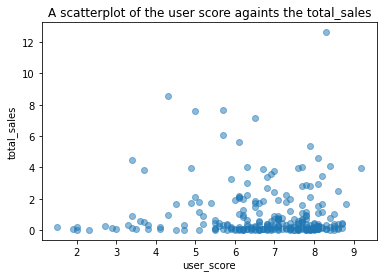

In [107]:
plt.scatter(x='user_score',y='total_sales',data=ps2_df[ps2_df['user_score']>0],alpha=0.5)
plt.title('A scatterplot of the user score againts the total_sales')
plt.xlabel('user_score')
plt.ylabel('total_sales')
plt.show()

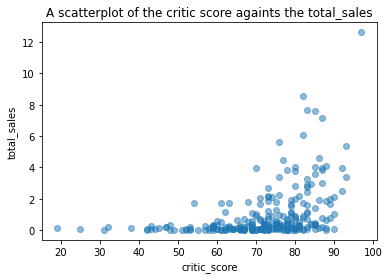

In [108]:
plt.scatter(x='critic_score',y='total_sales',data=ps2_df[ps2_df['critic_score']>0],alpha=0.5)
plt.title('A scatterplot of the critic score againts the total_sales')
plt.xlabel('critic_score')
plt.ylabel('total_sales')
plt.show()

In [69]:
ps2_df.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.153043,-0.203987,-0.104956,0.007660,-0.414508,-0.288583,-0.158807
na_sales,-0.153043,1.000000,0.654672,0.197182,0.566580,0.335728,0.291325,0.920762
eu_sales,-0.203987,0.654672,1.000000,0.224017,0.307067,0.252173,0.216680,0.781918
jp_sales,-0.104956,0.197182,0.224017,1.000000,0.175200,0.026007,0.022714,0.398318
other_sales,0.007660,0.566580,0.307067,0.175200,1.000000,0.150990,0.137641,0.714651
critic_score,-0.414508,0.335728,0.252173,0.026007,0.150990,1.000000,0.807020,0.300722
user_score,-0.288583,0.291325,0.216680,0.022714,0.137641,0.807020,1.000000,0.262266
total_sales,-0.158807,0.920762,0.781918,0.398318,0.714651,0.300722,0.262266,1.000000


Comment: Above we see that the higher the user score there are slightly more sales there are as the densitiy of the plots increases, but along the similar total sales area with a few high sales. It is also seen that the correlation between the user score and total sales is 0.262266 this shows a positive weak correlation between the two. 

The critic score against the total sales shows that the higher the critic score there a is a increase in total sales as the scatter plot slightly trends upwards as the score increases. The correlation between the two is 0.300722 which is a positive weak correlation but it is stronger than the user score againt total sales.

## User profile For Each Region<br>
<div id='userregion'></div>

For each region (NA, EU, JP), determine:
- The top five platforms. Describe variations in their market shares from region to region.
- The top five genres. Explain the difference.
- Do ESRB ratings affect sales in individual regions?

### Creating a profile for NA region<br>
<div id='nareg'></div>

In [70]:
#top five platforms in the na region
na_platform_sales = df.pivot_table(index='platform',values='na_sales',aggfunc='sum').reset_index()
na_platform_sales.sort_values(by='na_sales',ascending=False,inplace=True)
na_platform_sales[:5]

,platform,na_sales
28,X360,602.47
16,PS2,583.84
26,Wii,496.90
17,PS3,393.49
4,DS,382.40


In [71]:
#top five genres in the na region
na_genre_sales = df.pivot_table(index='genre',values='na_sales',aggfunc='sum').reset_index()
na_genre_sales.sort_values(by='na_sales',ascending=False,inplace=True)
na_genre_sales[:5]

,genre,na_sales
0,Action,879.01
10,Sports,684.43
8,Shooter,592.24
4,Platform,445.50
3,Misc,407.27


DS in na region and no PS as compared to eu region

### Creating a profile for EU region<br>
<div id='eureg'></div>

In [72]:
#top five platforms in the eu region
eu_platform_sales = df.pivot_table(index='platform',values='eu_sales',aggfunc='sum').reset_index()
eu_platform_sales.sort_values(by='eu_sales',ascending=False,inplace=True)
eu_platform_sales[:5]

,platform,eu_sales
16,PS2,339.29
17,PS3,330.29
28,X360,270.76
26,Wii,262.21
15,PS,213.61


In [73]:
#top five genres in the eu region
na_genre_sales = df.pivot_table(index='genre',values='eu_sales',aggfunc='sum').reset_index()
na_genre_sales.sort_values(by='eu_sales',ascending=False,inplace=True)
na_genre_sales[:5]

,genre,eu_sales
0,Action,519.13
10,Sports,376.79
8,Shooter,317.34
6,Racing,236.51
3,Misc,212.74


### Creating a profile for JP region<br>
<div id='jpreg'></div>

In [74]:
#top five platforms in the jp region
jp_platform_sales = df.pivot_table(index='platform',values='jp_sales',aggfunc='sum').reset_index()
jp_platform_sales.sort_values(by='jp_sales',ascending=False,inplace=True)
jp_platform_sales[:5]

,platform,jp_sales
4,DS,175.57
15,PS,139.82
16,PS2,139.20
23,SNES,116.55
2,3DS,100.67


In [75]:
#top five genres in the jp region
jp_platform_sales = df.pivot_table(index='genre',values='jp_sales',aggfunc='sum').reset_index()
jp_platform_sales.sort_values(by='jp_sales',ascending=False,inplace=True)
jp_platform_sales[:5]

,genre,jp_sales
7,Role-Playing,355.41
0,Action,161.43
10,Sports,135.54
4,Platform,130.83
3,Misc,108.11


Comment: The PS2 platform is in all the regions. The eu and na region have similar platforms as their top five. The DS is prominate in jp and is last in the na region. The PS is second in the jp region and last in the eu region. Lastly, the Xbox dominates the na region.

The genre that dominates the eu and the na region is the action, sport and shooter respectively for both regions.The shooting genre is not in the jp region top five genres. The difference lies in the fourth dominate genre for the eu and jp region, where rarcing is in the eu racing and platform in the na region. The dominate genre in the jp region is the role playing genre followed by action, sports, platform and misc.

Do ESRB ratings affect sales in individual regions?

<AxesSubplot:xlabel='rating', ylabel='na_sales'>

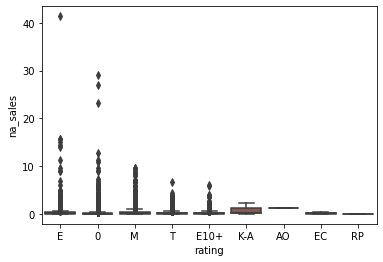

In [76]:
sns.boxplot(x='rating',y='na_sales',data=df)

<AxesSubplot:xlabel='rating', ylabel='jp_sales'>

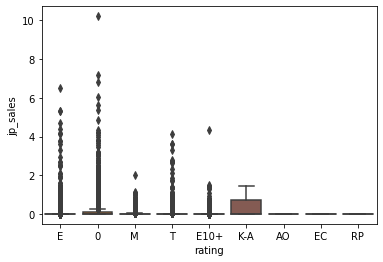

In [77]:
sns.boxplot(x='rating',y='jp_sales',data=df)

<AxesSubplot:xlabel='rating', ylabel='eu_sales'>

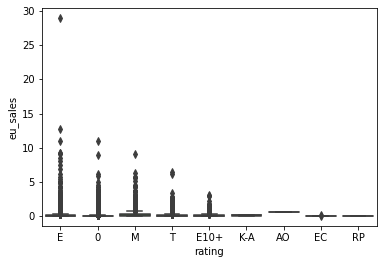

In [78]:
sns.boxplot(x='rating',y='eu_sales',data=df)

Comment: Above we ploted the box plots using the entire data frame it is seen that there are a lot of outliers for all the regions making it challenging to see the boxplots. 

Below the outliers are removed with a function then the box plots are plotted again without the outliers.

In [79]:
def lowerf(data):
    q1,q3 = np.percentile(data,[25,75])
    
    iqr = q3 - q1
    
    lower_fence = q1 - (1.5*iqr)
    return lower_fence
    
def higherf(data):
    q1,q3 = np.percentile(data,[25,75])
    
    iqr = q3 - q1
    
    higher_fence = q3 + (1.5*iqr)
    return higher_fence

df_no = df.copy()

In [80]:
# Determine the lower limits for outliers
region = ['na_sales','eu_sales','jp_sales']
for r in region:
    for x in df_no[r]:
        if x < lowerf(df_no[r]):
            df_no.drop(df_no[df_no[r]==x].index,inplace=True)
        

In [81]:
# Determine the upper limits for outliers
region = ['na_sales','eu_sales','jp_sales']
for r in region:
    for y in df_no[r]:
        if y > higherf(df_no[r]):
            df_no.drop(df_no[df_no[r]==y].index,inplace=True)


<AxesSubplot:xlabel='rating', ylabel='na_sales'>

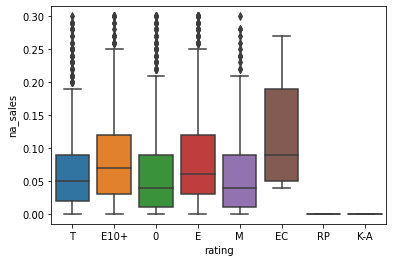

In [82]:
sns.boxplot(x='rating',y='na_sales',data=df_no)

Comment: EC rating has the highest median sales just below 0.10 and the plot is right skewed. The lowest rating is the M rating with estimated median below 0.05 and the plot is right skewed as well.

<AxesSubplot:xlabel='rating', ylabel='jp_sales'>

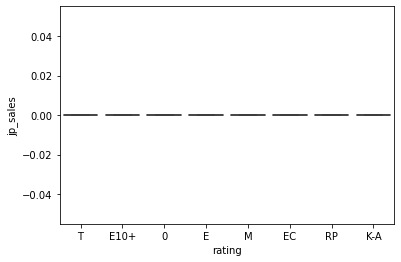

In [83]:
sns.boxplot(x='rating',y='jp_sales',data=df_no)

Comment: When the outliers were removed there appears to be not enough data on the jp region sales to plot box plots.

<AxesSubplot:xlabel='rating', ylabel='eu_sales'>

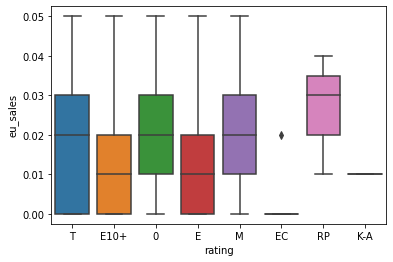

In [84]:
sns.boxplot(x='rating',y='eu_sales',data=df_no)

Comment: The highest rating is the RP rating in the eu region with median of above 0.03 and the plot is left skewed. The lowest rating in sales appears to be both the E10+ and E rating, where the distribution of the E10+ rating appears to be normal and the E rating plot being right skewed.

It is seen that the na region has higher sales than the eu region as the medians of the different ratings are higher than the medians of the eu region.

## Hypothesis Test<br>
<div id='hypotest'></div>

- Average user ratings of the Xbox One and PC platforms are the same.
- Average user ratings for the Action and Sports genres are different.

### Hypothesis Test: Average user ratings of the Xbox One and PC platforms are the same.<br>
<div id='hp1'></div>

Null hyphothesis: The average ratings are the same.

Alternative hyphothesis:The average ratings are different.

In [85]:
xbox_one_df = df.loc[(df['platform']=='XOne') & (df['user_score']>0)]
xbox_one_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
165,Grand Theft Auto V,XOne,2014.0,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
179,Call of Duty: Advanced Warfare,XOne,2014.0,Shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26
242,Halo 5: Guardians,XOne,2015.0,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49
270,Fallout 4,XOne,2015.0,Role-Playing,2.51,1.32,0.01,0.38,88.0,6.2,M,4.22
373,Assassin's Creed: Unity,XOne,2014.0,Action,2.27,0.90,0.00,0.33,72.0,4.1,M,3.50


In [86]:
pc_df = df.loc[(df['platform']=='PC') & (df['user_score']>0)]
pc_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
85,The Sims 3,PC,2009.0,Simulation,0.99,6.42,0.00,0.60,86.0,7.6,T,8.01
138,World of Warcraft,PC,2004.0,Role-Playing,0.08,6.21,0.00,0.00,93.0,7.3,T,6.29
192,Diablo III,PC,2012.0,Role-Playing,2.44,2.16,0.00,0.54,88.0,4.0,M,5.14
218,StarCraft II: Wings of Liberty,PC,2010.0,Strategy,2.57,1.68,0.00,0.58,93.0,8.2,T,4.83
284,Half-Life,PC,1997.0,Shooter,4.03,0.00,0.09,0.00,96.0,9.1,M,4.12


In [87]:
results = st.ttest_ind(xbox_one_df['user_score'],pc_df['user_score'])

In [88]:
alpha = 0.05
print(f'alpha level: {alpha},pvalue: {results.pvalue}')
print()
if results.pvalue<alpha:
    print('We fail to reject the null in favour of the alternative')
else:
    print('We reject the null in favour of the alternative')

alpha level: 0.05,pvalue: 1.3896435533548819e-05

We fail to reject the null in favour of the alternative


### Hypothesis Test: Average user ratings for the Action and Sports genres are different.<br>
<div id='hp2'></div>

Null hyphothesis: The average ratings are the different.

Alternative hyphothesis:The average ratings are same.

In [89]:
action_df = df.loc[(df['genre']=='Action') & (df['user_score']>0)]
action_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
17,Grand Theft Auto: San Andreas,PS2,2004.0,Action,9.43,0.40,0.41,10.57,95.0,9.0,M,20.81
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
24,Grand Theft Auto: Vice City,PS2,2002.0,Action,8.41,5.49,0.47,1.78,95.0,8.7,M,16.15
38,Grand Theft Auto III,PS2,2001.0,Action,6.99,4.51,0.30,1.30,97.0,8.5,M,13.10


In [90]:
sports_df = df.loc[(df['genre']=='Sports') & (df['user_score']>0)] 
sports_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
13,Wii Fit,Wii,2007.0,Sports,8.92,8.03,3.60,2.15,80.0,7.7,E,22.70
15,Wii Fit Plus,Wii,2009.0,Sports,9.01,8.49,2.53,1.77,80.0,7.4,E,21.80
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58


In [91]:
results = st.ttest_ind(action_df['user_score'],sports_df['user_score'])

In [92]:
alpha = 0.05
print(f'alpha level: {alpha},pvalue: {results.pvalue}')
print()
if results.pvalue<alpha:
    print('We fail to reject the null in favour of the alternative')
else:
    print('We reject the null in favour of the alternative')

alpha level: 0.05,pvalue: 0.10406951359049141

We reject the null in favour of the alternative


## General Conclusion<br>
<div id='gencon'></div>

What was completed in this project is to upload the libraries that were needed for the project then data was imported and cleaned. How was the data cleaned? Firstly, the columns were placed in the correct snake_case. The missing score values were replaced by the value zero to prevent the data from being distorted. Some of the release year missing values were replaced by the years in the game name, the remaining records were left as NA. A column total sales was created to add the total sales of each game from all the regions. From there the data analysis was performed the respective comments and conclusions were given per analysis above. In summary the analysis showed that sales in europe are lower than the sales in north america. The popular genres in europe and north america are similar but this is not the case in japan. This applies to the platforms as well europe and north america have similar popluar platforms where as japan has different popular platforms compared to the two regions. It was also found that the critic score has a slightly larger influence on total sales than the user score as it has a stronger correlation than the user score total sales correlation. The hypothesis test performed that the average ratings for the PC and Xbox are the same as we reject the null hypothesis and it also showed that the average ratings for the sports and action game genres are the same as we accept the null hypothesis as well.